In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM protein3"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-02-28 01:55:51,,inf,2024-02-28 01:55:51
2024-02-28 01:55:51,MQ5,inf,2024-02-28 01:55:51
2024-02-28 01:55:52,MQ6,inf,2024-02-28 01:55:52
2024-02-28 01:55:52,MQ7,inf,2024-02-28 01:55:52
2024-02-28 01:55:52,MQ8,inf,2024-02-28 01:55:52
...,...,...,...
2024-02-28 02:27:12,,inf,2024-02-28 02:27:12
2024-02-28 02:27:13,MQ5,inf,2024-02-28 02:27:13
2024-02-28 02:27:13,MQ6,inf,2024-02-28 02:27:13


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-02-28 01:55:53,TGS2600,0.953550339,2024-02-28 01:55:53
2024-02-28 01:55:53,TGS2602,0.955763400,2024-02-28 01:55:53
2024-02-28 01:55:57,TGS2603,0.159256801,2024-02-28 01:55:57
2024-02-28 01:55:57,TGS2610,0.480427057,2024-02-28 01:55:57
2024-02-28 01:55:57,TGS2611,0.324909747,2024-02-28 01:55:57
...,...,...,...
2024-02-28 02:27:06,TGS2602,1.063365936,2024-02-28 02:27:06
2024-02-28 02:27:06,TGS2612,1.063552976,2024-02-28 02:27:06
2024-02-28 02:27:09,TGS2603,0.119442597,2024-02-28 02:27:09


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-02-28 01:55:53  0.953550339 2024-02-28 01:55:53
 2024-02-28 01:56:43  2.203901052 2024-02-28 01:56:43
 2024-02-28 01:57:02  1.711338758 2024-02-28 01:57:02
 2024-02-28 01:57:12  1.452427745 2024-02-28 01:57:12
 2024-02-28 01:57:43  1.124052763 2024-02-28 01:57:43
 ...                          ...                 ...
 2024-02-28 02:25:20  1.079848409 2024-02-28 02:25:20
 2024-02-28 02:25:45  1.016699433 2024-02-28 02:25:45
 2024-02-28 02:26:08  1.016699433 2024-02-28 02:26:08
 2024-02-28 02:26:19  1.016699433 2024-02-28 02:26:19
 2024-02-28 02:26:29  1.016699433 2024-02-28 02:26:29
 
 [82 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-02-28 01:55:53  0.955763400 2024-02-28 01:55:53
 2024-02-28 01:56:14  2.785006046 2024-02-28 01:56:14
 2024-02-28 01:56:24  2.949574471 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

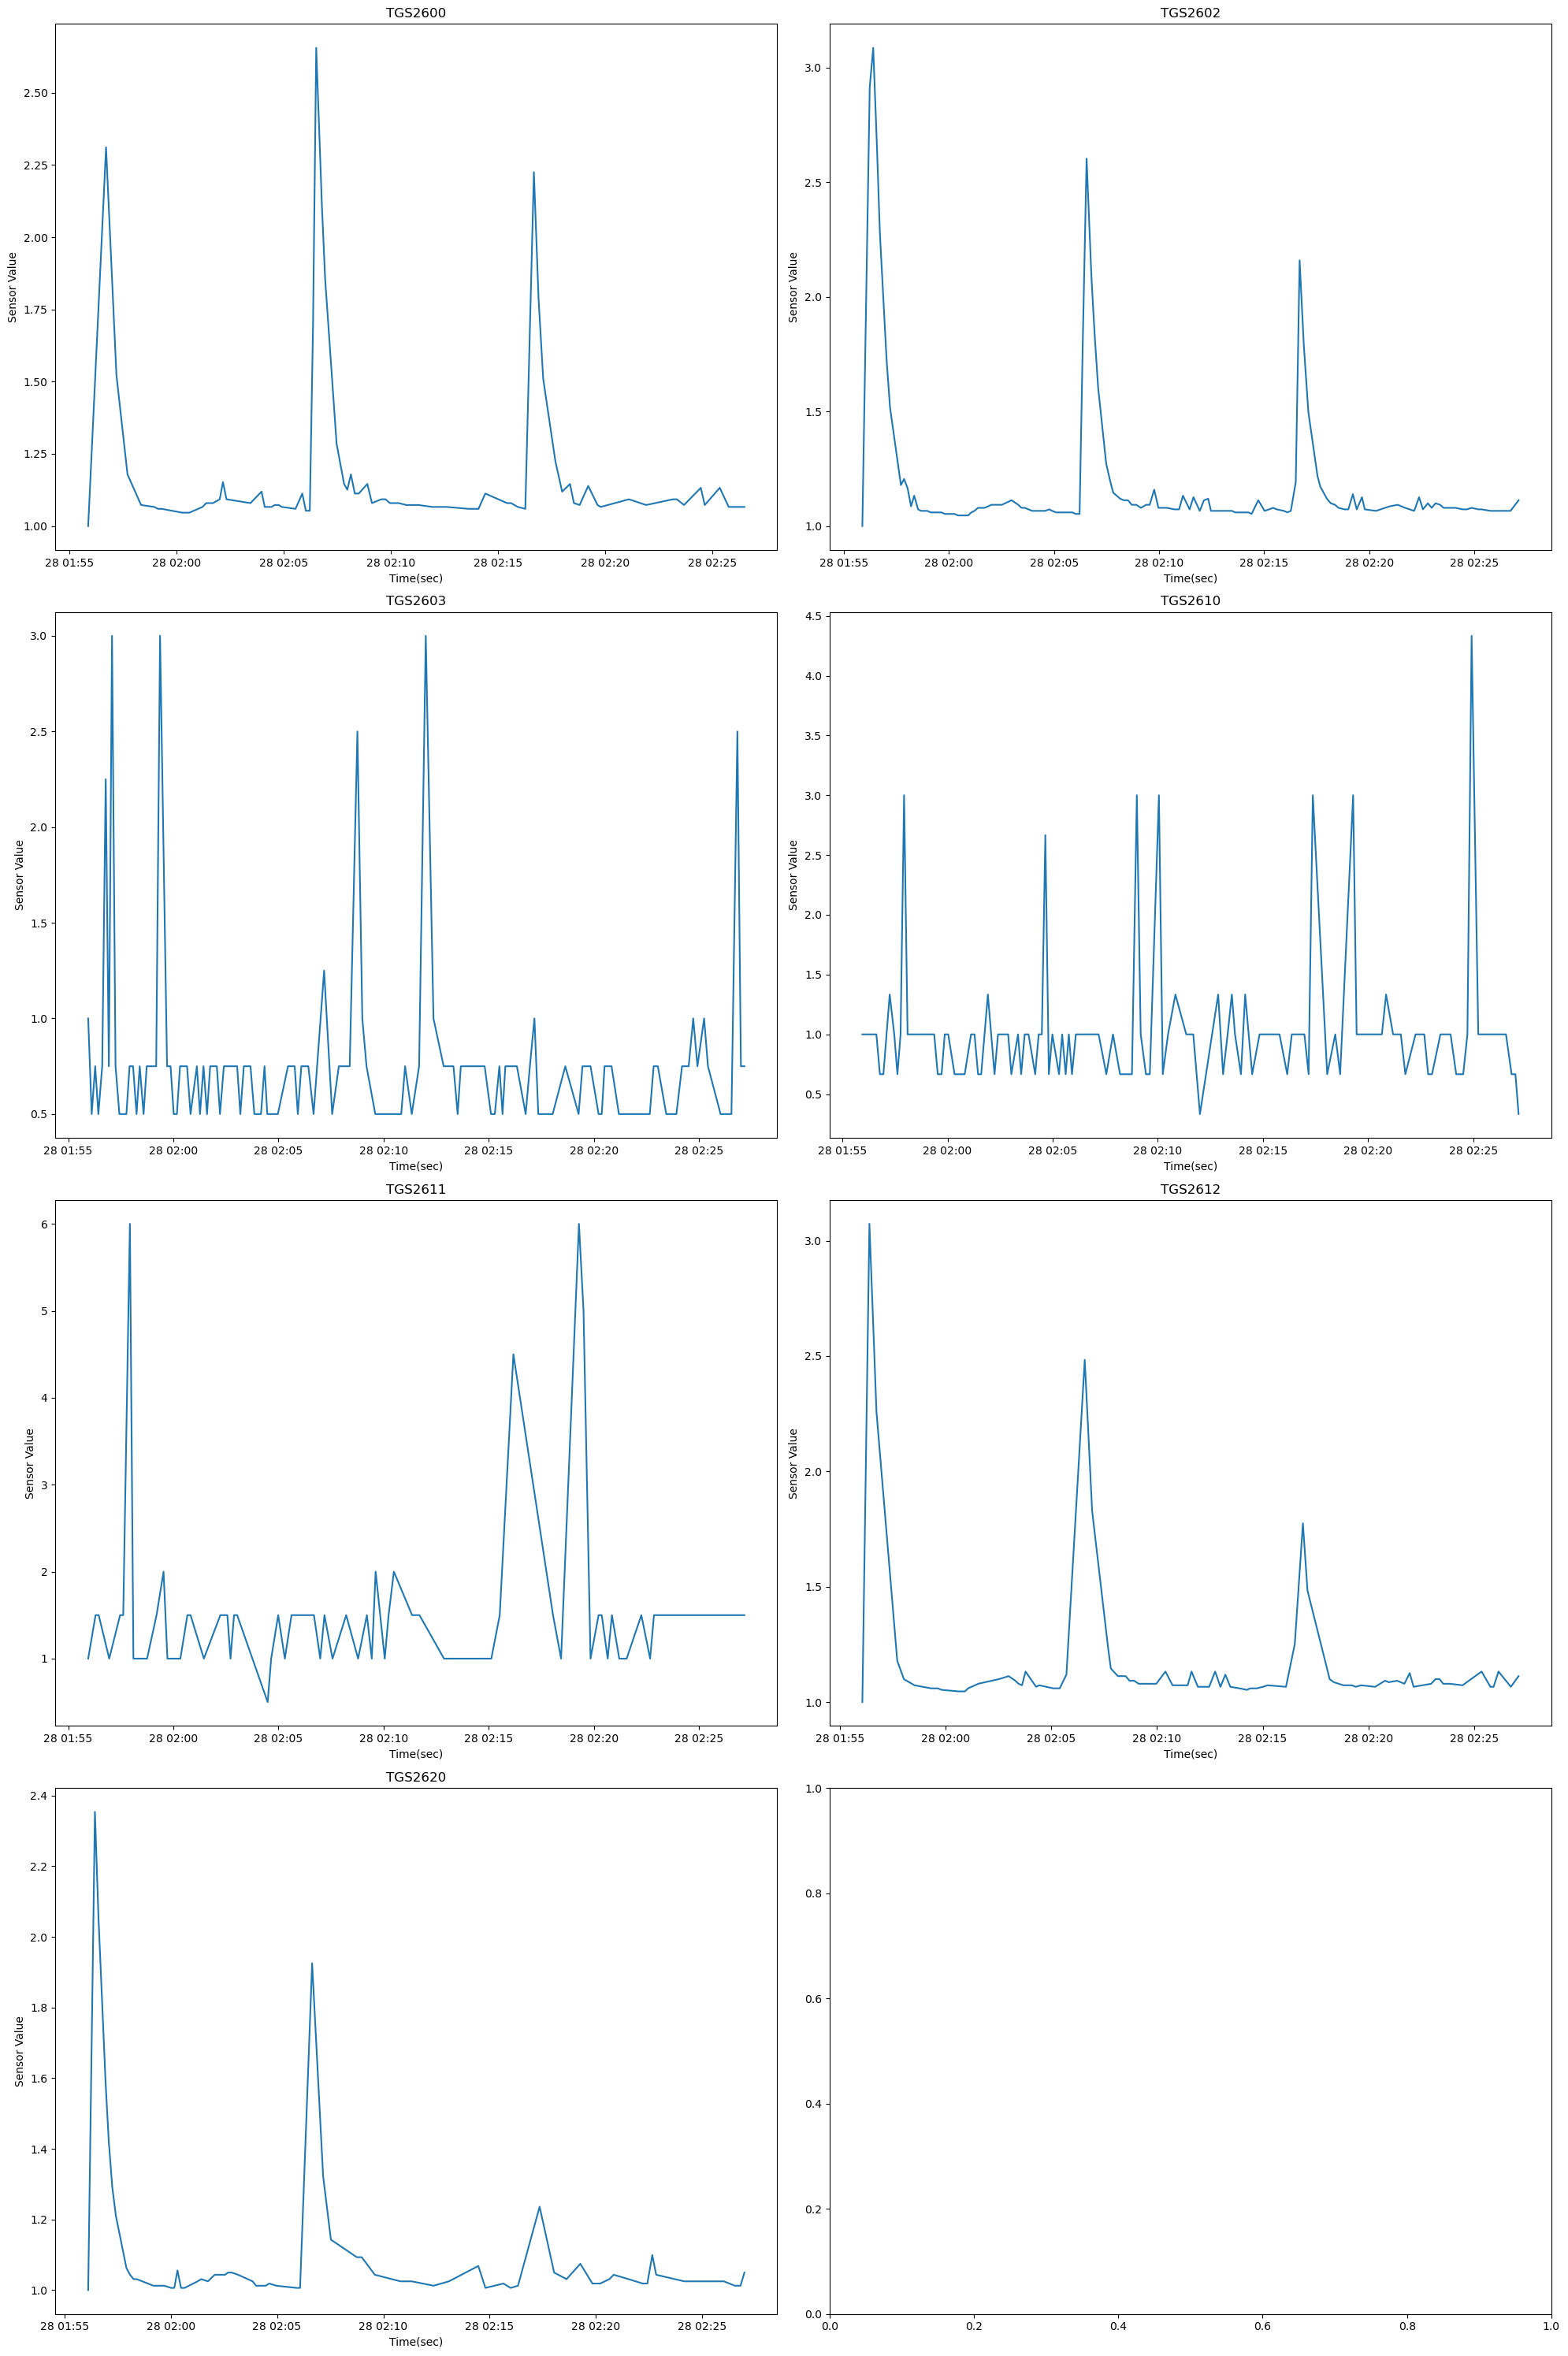

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()